# <font color = "Blue"> Bootcamp PreWork </font>
**Math & Stats**
**2020, Sep.**

In Python we need to load a set of basic modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.style.use('seaborn')

Then we create a pandas DataFrame using the constructor as

In [2]:
mydf = pd.DataFrame({'values': [6, 20, 28, 16, 16, 17, 1, 17, 11, 13, 7, 13, 16, 
                                8, 10, 9, 4, 9, 6, 13, 11, 12, 10, 3, 12, 19, 10, 
                                15, 11, 11, 17, 20, 8, 6, 3, 20, 19, 3, 19, 20]})
mydf.head()

,values
0,6
1,20
2,28
3,16
4,16


The quantities needed to perform a basic EDA can be found using the methods of the DataFrame structure. See, however, that we have used `ss.iqr()` instead of the `quantile()` method of pandas just because it is a single function

In [3]:
mean = mydf['values'].mean()
median = mydf['values'].median()
mode = mydf['values'].mode()
sd = mydf['values'].std()
iqr = ss.iqr(mydf['values'])
skew = mydf['values'].skew()
kurto = mydf['values'].kurt()

print('CENTRAL TENDENCY MEASURES\n',
     '{:<20}'.format('Mean:'), '{:<4.4}\n'.format(mean),
     '{:<20}'.format('Median:'), '{:<4.4}\n'.format(median),
     '{:<20}'.format('Mode:'), [mode[i] for i in range(len(mode))], '\n\n',
     'VARIABILITY MEASURES\n',
     '{:<20}'.format('Standard Deviation:'), '{:<4.4}\n'.format(sd),
     '{:<20}'.format('IQR:'), '{:<4.4}\n\n'.format(iqr),
      'SHAPE MEASURES\n',
     '{:<20}'.format('Skewness:'), '{:<4.4}\n'.format(skew),
     '{:<20}'.format('Kurtosis:'), '{:<4.4}\n'.format(kurto),
     )

CENTRAL TENDENCY MEASURES
 Mean:                12.22
 Median:              11.5
 Mode:                [11, 20] 

 VARIABILITY MEASURES
 Standard Deviation:  6.032
 IQR:                 9.0 

 SHAPE MEASURES
 Skewness:            0.2212
 Kurtosis:            -0.2301



### Frequency Distribution

In order to find the **frequency distribution** we can use the `np.histogram()` function which returns two numpy arrays, one with the **frequencies** and another with the **lowest boundaries** of the classes.

In the following chunk we generate a DataFrame with that information and add a third column with the **Class Marks**, i.e. the midpoints of each class

In [4]:
freqs, bounds = np.histogram(mydf['values'], bins = 7)

cmarks = np.empty(len(freqs))
for i in range(len(bounds)-1):
    cmarks[i] = (bounds[i]+bounds[i+1])/2


freq_dist = pd.DataFrame({'LBound': np.delete(bounds, -1),
                          'CMarks': cmarks,
                          'Freqs': freqs})
freq_dist

,LBound,CMarks,Freqs
0,1.000000,2.928571,5
1,4.857143,6.785714,6
2,8.714286,10.642857,11
3,12.571429,14.500000,7
4,16.428571,18.357143,10
5,20.285714,22.214286,0
6,24.142857,26.071429,1


The easiest way to make a graphical representation is using `matplotlib` by means of its `pyplot` module. In this case we have to be explicit with the different options for the grid of plots, which can be done using the `subplot2grid()` function. Apart from that, we use the `hist()` and `boxplot()` functions of `pyplot` 

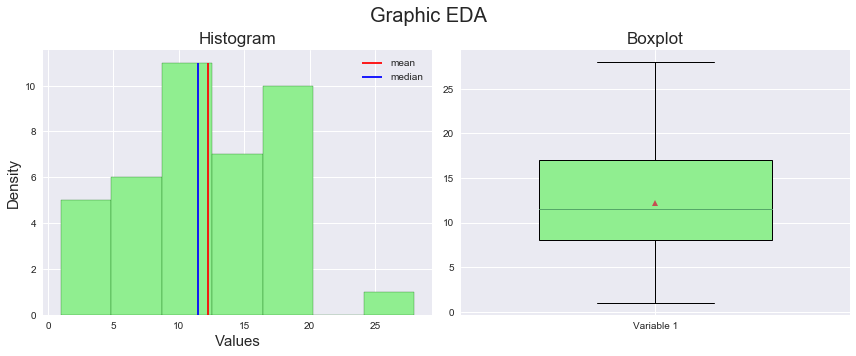

In [5]:
plt.figure(figsize = (12,5))
plt.suptitle("Graphic EDA", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.hist(mydf['values'],
         color = 'lightgreen',
         ec = 'darkgreen',
         #density = True,
         bins = 7)

plt.vlines(x=mean, ymin=0, ymax= 11, label='mean', color='red')
plt.vlines(x=median, ymin=0, ymax= 11, label='median', color='blue')

plt.title('Histogram', fontsize = 17)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend(loc = 'best')

plt.subplot2grid((1,2), (0,1))
plt.boxplot(mydf['values'],
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            labels = ["Variable 1"],
            boxprops = dict(facecolor = 'lightgreen'),
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))
plt.title('Boxplot', fontsize = 17)

plt.tight_layout(rect = (0, 0, 1, 0.94))
plt.show()

#### Approximated Values

We talk about approximated values for this grouped type of data. To find them we need the cumulative frequencies, which can be found with the `cumsum()` function

In [6]:
freq_dist['CFreqs'] = freq_dist['Freqs'].cumsum()
freq_dist

,LBound,CMarks,Freqs,CFreqs
0,1.000000,2.928571,5,5
1,4.857143,6.785714,6,11
2,8.714286,10.642857,11,22
3,12.571429,14.500000,7,29
4,16.428571,18.357143,10,39
5,20.285714,22.214286,0,39
6,24.142857,26.071429,1,40


Following the same steps as in R, let's find the **approximated median**

In [7]:
n = np.sum(freq_dist['Freqs'])
cm_index = np.array(np.where(freq_dist['CFreqs'] <= n/2))[0][-1] + 1

xi = freq_dist['LBound'][cm_index]
ki = freq_dist['CFreqs'][cm_index]
ni = freq_dist['Freqs'][cm_index]
wi = freq_dist['LBound'][1] - freq_dist['LBound'][0]

app_median = xi + wi*(n/2-ki)/ni

and the **approximated mode**

In [8]:
m_freq = max(freq_dist['Freqs'])
mod_index = freq_dist.index[freq_dist['Freqs'] == m_freq][0]

xi_m = freq_dist['LBound'][mod_index]
Dl = m_freq - freq_dist['Freqs'][mod_index -1]
Du = m_freq - freq_dist['Freqs'][mod_index + 1]

app_mode = xi_m + wi*(Dl/(Dl+Du))

Now we can find all the other values just using the **class marks** and the **frequencies**. The results are

In [9]:
app_mean = np.sum(freq_dist.CMarks * freq_dist.Freqs)/n
app_sd = np.sqrt(np.sum(freq_dist.Freqs*(freq_dist.CMarks - app_mean)**2)/n-1)
app_skew = np.sqrt(np.sum(freq_dist.Freqs*(freq_dist.CMarks - app_mean)**3)/(app_sd**3*n))
app_kurto = np.sqrt(np.sum(freq_dist.Freqs*(freq_dist.CMarks - app_mean)**4)/(app_sd**4*n))-3

print('CENTRAL TENDENCY MEASURES\n',
     '{:<25}'.format('Approx. Mean:'), '{:<4.4}\n'.format(app_mean),
     '{:<25}'.format('Approx. Median:'), '{:<4.4}\n'.format(app_median),
     '{:<25}'.format('Approx. Mode:'), '{:<4.4}\n'.format(app_mode),
     '\nVARIABILITY MEASURES\n',
     '{:<25}'.format('Approx. St. Deviation:'), '{:<4.4}\n'.format(app_sd),
#     '{:<20}'.format('IQR:'), '{:<4.4}\n\n'.format(app_iqr),
      '\nSHAPE MEASURES\n',
     '{:<25}'.format('Approx. Skewness:'), '{:<4.4}\n'.format(app_skew),
     '{:<25}'.format('Approx. Kurtosis:'), '{:<4.4}\n'.format(app_kurto),
     )

CENTRAL TENDENCY MEASURES
 Approx. Mean:             12.09
 Approx. Median:           8.013
 Approx. Mode:             10.86
 
VARIABILITY MEASURES
 Approx. St. Deviation:    5.478
 
SHAPE MEASURES
 Approx. Skewness:         0.2817
 Approx. Kurtosis:         -1.386



To plot the total and relative frequencies we use the `subplot2grid()` function again. However, we need to add the relative frequencies to the DataFrame, then

In [10]:
freq_dist['RFreqs'] = freq_dist['Freqs']/n
freq_dist['CRFreqs'] = freq_dist['CFreqs']/n
freq_dist

,LBound,CMarks,Freqs,CFreqs,RFreqs,CRFreqs
0,1.000000,2.928571,5,5,0.125,0.125
1,4.857143,6.785714,6,11,0.150,0.275
2,8.714286,10.642857,11,22,0.275,0.550
3,12.571429,14.500000,7,29,0.175,0.725
4,16.428571,18.357143,10,39,0.250,0.975
5,20.285714,22.214286,0,39,0.000,0.975
6,24.142857,26.071429,1,40,0.025,1.000


In Python we have a problem with the density option in the Histogram: it does not return the relative frequencies but the `density` which is taken as the relative frequency divided by the bin width! So be careful with this option. In this case we will solve it using a **barplot** and adjusting the space inbetween the bars by means of their width.

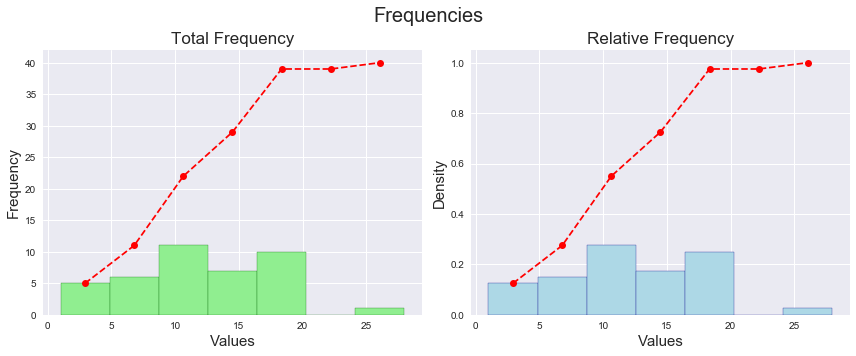

In [11]:
plt.figure(figsize = (12,5))
plt.suptitle("Frequencies", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.hist(mydf['values'],
         color = 'lightgreen',
         ec = 'darkgreen',
         bins = 7)

plt.title('Total Frequency', fontsize = 17)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.plot(freq_dist.CMarks, freq_dist.CFreqs, marker = 'o', ls = 'dashed', color = 'red')

plt.subplot2grid((1,2), (0,1))
w = freq_dist.CMarks[1]-freq_dist.CMarks[0]
plt.bar(freq_dist['CMarks'], freq_dist['RFreqs'], 
        width = w, 
        ec ='Darkblue', 
        color = 'lightblue')

plt.title('Relative Frequency', fontsize = 17)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

plt.plot(freq_dist.CMarks, freq_dist.CRFreqs, marker = 'o', ls = 'dashed', color = 'red')

plt.tight_layout(rect = (0, 0, 1, 0.94))
plt.show()